<a href="https://colab.research.google.com/github/luisleonb/Proyecto-Modulo-5-ABP/blob/main/Proyecto_M5_Luis_Le%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Módulo 5: Análisis estadístico sobre hábitos saludables en jóvenes universitarios

Luis León Barrera

##Lección 1: Método Científico y Estadística



###1. Definición del problema a investigar:

Se busca analizar factores que influyen en los hábitos saludables en jóvenes universitarios, con foco en la actividad física. Se quiere ***evaluar si el promedio de minutos de actividad física semanal es menor que la recomendación de 150 minutos establecida por guías de salud.***

###2. Formulación de Hipótesis:


*   Hipótesis Nula $H_0$: Los jóvenes universitarios en hacen al menos 150 minutos de actividad física a la semana.
*   Hipótesis Alternativa $H_1$: Los jóvenes hacen menos de 150 de actividad física a la semana.

En notación estadística:
*   $H_0$: $\mu$ $\ge$  150
*   $H_1$: $\mu$ $<$  150

###3. Identificación de variables:
#### 3.1. Variables cuantitativas:
* **Actividad física semanal**: tiempo total en minutos dedicado al ejercicio por semana. Variable *continua*.
* **Horas de sueño**: promedio de horas dormidas durante la semana. Variable *continua*.
* **Edad del estudiante**: edad del estudiante al momento del estudio (en años). Variable *discreta*.
* **Consumo de agua**: litros de agua ingerida diariamente por el estudiante. Variable *continua*.

#### 3.2. Variables cualitativas:
* **Género**: Masculino, Femenino, Otro. *Nominal*
* **Carrera**: Área de estudio (ingenieria, salud, artes, etc.). *Nominal*
* **Nivel de estrés percibido**: Bajo, medio, alto. *Ordinal*
* **Frecuencia de consumo comida rápida**: Nunca, 1-2 veces por semana, +3 veces por semana. *Ordinal*
* **Calidad del sueño**: Buena, regular, mala. *Ordinal*

##4. Enfoque metodológico elegido
Para el desarrollo de este proyecto se trabajará con un enfoque cuantitativo con apoyo de variables cualitativas. Este enfoque permite medir numéricamente los hábitos saludables (por ejemplo, minutos de actividad física, horas de sueño) y, al mismo tiempo, relacionarlos con variables categóricas como género, carrera o nivel de estrés, facilitando el análisis estadístico posterior.

Se aplicará el método científico deductivo con un enfoque cuantitativo. Este proceso iniciará con la observación de la problemática de salud estudiantil, seguida por la formulación de hipótesis contrastables ($H_0$ y $H_1$). La fase de experimentación se sustituirá por una simulación de datos rigurosa y un análisis estadístico inferencial para validar o rechazar las premisas iniciales, asegurando la objetividad en las conclusiones.

##5. Diseño preliminar del estudio
* **Población objetivo**: jóvenes universitarios de distintas carreras de una universidad.
* **Tipo de estudio**: observacional, transversal.
* **Técnica de muestreo**: se propone un muestreo aleatorio simple, con una muestra de al menos 100 estudiantes.
  *  Para efectos de este proyecto se realizará una simulación de datos utilizando la librería pandas en Python, respetando las características definidas para cada variable.

##Lección 2: Probabilidad y Estadística

In [41]:
#Librerias
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [42]:
np.random.seed(42)
n_estudiantes = 100

#Creación de dataset simulado
data = {
    'minutos_ejercicio': np.random.normal(142, 30, n_estudiantes).clip(0), #uso de clip para que el mínimo sea 0
    'horas_sueño': np.random.normal(7, 2, n_estudiantes).clip(0,24),
    'edad': np.random.randint(18,25, n_estudiantes),
    'consumo_agua': np.random.normal(3, 1, n_estudiantes).clip(0.5),
    'nivel_estres': np.random.choice(['Bajo', 'Medio', 'Alto'], n_estudiantes, p=[0.2, 0.5, 0.3]),
    'carrera': np.random.choice(['Ingenieria', 'Salud', 'Artes', 'Leyes'], n_estudiantes, p=[0.3, 0.3, 0.1, 0.3]),
    'genero': np.random.choice(['Masculino', 'Femenino', 'Otro'], n_estudiantes, p=[0.45, 0.50, 0.05]),
    'frecuencia_comida_rapida': np.random.choice(['Nunca', '1-2 veces por semana', '+3 veces por semana'], n_estudiantes, p=[0.3, 0.4, 0.3]),
    'calidad_sueño': np.random.choice(['Buena', 'Regular', 'Mala'], n_estudiantes, p=[0.3, 0.4, 0.3])
}

df = pd.DataFrame(data)
df.describe()

,minutos_ejercicio,horas_sueño,edad,consumo_agua
count,100.000000,100.000000,100.000000,100.000000
mean,138.884604,7.044609,21.040000,3.099692
std,27.245053,1.907338,2.073985,1.099784
min,63.407647,3.162458,18.000000,0.500000
25%,123.972830,5.388679,19.000000,2.409540
50%,138.191311,7.168214,21.000000,3.142030
75%,154.178562,8.076341,23.000000,3.886898
max,197.568346,12.440338,24.000000,6.187033


In [43]:
#Guardado de dataset en csv
df.to_csv('datos_estudiantes.csv', index=False)

Eventos aleatorios:

* Evento A: Estudiante sedentario -> minutos_ejercicio < 150
* Evento B: Estrés alto -> nivel_estres = alto

Se buscará calcular la P(A), P(B), P(A $\cap$ B), P(A $\cup$ B)


Justificación del Muestreo

* Método: Muestreo Aleatorio Simple (MAS).
* Justificación: Se seleccionó este método para asegurar que cada individuo de la población universitaria tenga la misma probabilidad de ser incluido en la muestra. Dado que la simulación utiliza np.random, garantizamos la independencia de las observaciones, requisito fundamental para aplicar el Teorema del Límite Central en etapas posteriores.

In [44]:
#Probabilidad de A
p_a = (df['minutos_ejercicio'] < 150).mean()

#Probabilidad de B
p_b = (df['nivel_estres'] == 'Alto').mean()

#Probabilidad A inter B
p_ayb = ((df['minutos_ejercicio'] < 150) & (df['nivel_estres'] == 'Alto')).mean()

#Probabilidad de A unión B
p_aub = p_a + p_b - p_ayb

print(f"P(A): {p_a:.2f}")
print(f"P(B): {p_b:.2f}")
print(f"P(A ∩ B): {p_ayb:.2f}")
print(f"P(A ∪ B): {p_aub:.2f}")

P(A): 0.65
P(B): 0.27
P(A ∩ B): 0.21
P(A ∪ B): 0.71


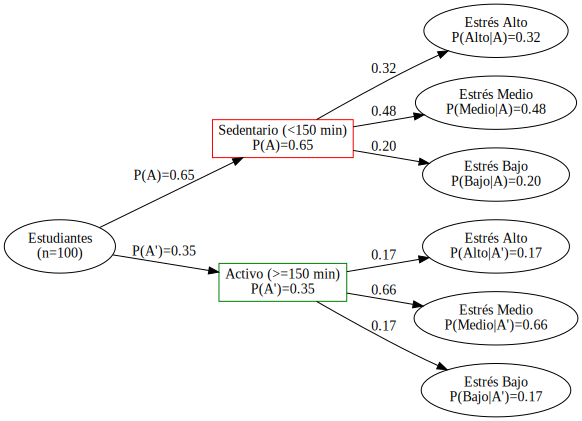

In [45]:
#Arbol de probabilidades

# 1. Calculamos probabilidades marginales para la primera división (Ejercicio)
p_a = (df['minutos_ejercicio'] < 150).mean()  # Probabilidad de Sedentarismo
p_not_a = 1 - p_a                              # Probabilidad de Activo

# 2. Segmentamos para calcular probabilidades condicionales (Estrés dado Ejercicio)
df_a = df[df['minutos_ejercicio'] < 150]
df_not_a = df[df['minutos_ejercicio'] >= 150]

# Condicionales para Sedentarios (A)
p_alto_a = (df_a['nivel_estres'] == 'Alto').mean()
p_medio_a = (df_a['nivel_estres'] == 'Medio').mean()
p_bajo_a = (df_a['nivel_estres'] == 'Bajo').mean()

# Condicionales para Activos (A')
p_alto_not_a = (df_not_a['nivel_estres'] == 'Alto').mean()
p_medio_not_a = (df_not_a['nivel_estres'] == 'Medio').mean()
p_bajo_not_a = (df_not_a['nivel_estres'] == 'Bajo').mean()

# 3. Creación del gráfico con Graphviz
dot = graphviz.Digraph(comment='Árbol de Probabilidades Hábitos Saludables')
dot.attr(rankdir='LR', size='10,6') # De izquierda a derecha para mejor lectura

# Nodo Raíz
dot.node('R', 'Estudiantes\n(n=100)', shape='ellipse')

# Nivel 1: Actividad Física
dot.node('A', f'Sedentario (<150 min)\nP(A)={p_a:.2f}', shape='box', color='red')
dot.node('NA', f'Activo (>=150 min)\nP(A\')={p_not_a:.2f}', shape='box', color='green')

# Nivel 2: Estrés para Sedentarios
dot.node('A_H', f'Estrés Alto\nP(Alto|A)={p_alto_a:.2f}')
dot.node('A_M', f'Estrés Medio\nP(Medio|A)={p_medio_a:.2f}')
dot.node('A_L', f'Estrés Bajo\nP(Bajo|A)={p_bajo_a:.2f}')

# Nivel 2: Estrés para Activos
dot.node('NA_H', f'Estrés Alto\nP(Alto|A\')={p_alto_not_a:.2f}')
dot.node('NA_M', f'Estrés Medio\nP(Medio|A\')={p_medio_not_a:.2f}')
dot.node('NA_L', f'Estrés Bajo\nP(Bajo|A\')={p_bajo_not_a:.2f}')

dot.edge('R', 'A', label=f'P(A)={p_a:.2f}')
dot.edge('R', 'NA', label=f'P(A\')={p_not_a:.2f}')

dot.edge('A', 'A_H', label=f'{p_alto_a:.2f}')
dot.edge('A', 'A_M', label=f'{p_medio_a:.2f}')
dot.edge('A', 'A_L', label=f'{p_bajo_a:.2f}')
dot.edge('NA', 'NA_H', label=f'{p_alto_not_a:.2f}')
dot.edge('NA', 'NA_M', label=f'{p_medio_not_a:.2f}')
dot.edge('NA', 'NA_L', label=f'{p_bajo_not_a:.2f}')

dot

### Interpretación del árbol

**Hallazgo clave**: Los estudiantes sedentarios (<150 min ejercicio) presentan una mayor proporción de **estrés alto** (32%) comparado con los activos (17%).

**Probabilidades conjuntas calculables:**
P(Sedentario Y Estrés Alto) = P(A) × P(Alto|A) = 0.65 × 0.32 = 0.21

##Lección 3: Distribución de Probabilidad

Variables continuas: minutos_ejercicio, horas_sueño, consumo_agua. Normal por TLC y simetría observada.


Variable discreta: edad. Uniforme

Varibales contínuas: nivel_estres, carrera, genero, frecuencia_comida_rapida, calidad_sueño. Multinomial (probs fijas)

In [46]:
# === ANÁLISIS COMPLETO DE LAS VARIABLES EN ESTUDIO===
distribuciones_completas = {
    'minutos_ejercicio': {
        'tipo': 'continua', 'dist': 'Normal',
        'justif': 'Tiempos simétricos → Normal(μ=138.9, σ=27.2)'
    },
    'horas_sueño': {
        'tipo': 'continua', 'dist': 'Normal',
        'justif': 'Sueño típico → Normal(μ=7.0, σ=1.9)'
    },
    'edad': {
        'tipo': 'discreta', 'dist': 'Uniforme discreta',
        'justif': 'Rango fijo 18-24 años uniformemente'
    },
    'consumo_agua': {
        'tipo': 'continua', 'dist': 'Normal truncada',
        'justif': 'Litros diarios → Normal(μ=3.1, σ=1.1), truncada >0.5L'
    },
    'nivel_estres': {
        'tipo': 'categórica ordinal', 'dist': 'Multinomial',
        'justif': '3 categorías fijas [20%,50%,30%]'
    },
    'carrera': {
        'tipo': 'categórica nominal', 'dist': 'Multinomial',
        'justif': '4 categorías fijas [30%,30%,10%,30%]'
    },
    'genero': {
        'tipo': 'categórica nominal', 'dist': 'Multinomial',
        'justif': '3 categorías [45%,50%,5%]'
    },
    'frecuencia_comida_rapida': {
        'tipo': 'categórica ordinal', 'dist': 'Multinomial',
        'justif': '3 categorías hábitos alimenticios [30%,40%,30%]'
    },
    'calidad_sueño': {
        'tipo': 'categórica ordinal', 'dist': 'Multinomial',
        'justif': '3 niveles subjetivos [30%,40%,30%]'
    }
}

# TABLA COMPLETA
tabla = []
for var, info in distribuciones_completas.items():
    params = f"μ={df[var].mean():.1f}" if 'continua' in info['tipo'] else f"p={[round(df[var].value_counts(normalize=True).max(),2)]}"
    tabla.append([var, info['tipo'], info['dist'], info['justif'], params])

df_tabla = pd.DataFrame(tabla, columns=['Variable', 'Tipo', 'Distribución', 'Justificación', 'Parámetros'])
print("TABLA DISTRIBUCIONES")
df_tabla


TABLA DISTRIBUCIONES


,Variable,Tipo,Distribución,Justificación,Parámetros
0,minutos_ejercicio,continua,Normal,"Tiempos simétricos → Normal(μ=138.9, σ=27.2)",μ=138.9
1,horas_sueño,continua,Normal,"Sueño típico → Normal(μ=7.0, σ=1.9)",μ=7.0
2,edad,discreta,Uniforme discreta,Rango fijo 18-24 años uniformemente,p=[0.2]
3,consumo_agua,continua,Normal truncada,"Litros diarios → Normal(μ=3.1, σ=1.1), truncad...",μ=3.1
4,nivel_estres,categórica ordinal,Multinomial,"3 categorías fijas [20%,50%,30%]",p=[0.54]
5,carrera,categórica nominal,Multinomial,"4 categorías fijas [30%,30%,10%,30%]",p=[0.39]
6,genero,categórica nominal,Multinomial,"3 categorías [45%,50%,5%]",p=[0.61]
7,frecuencia_comida_rapida,categórica ordinal,Multinomial,"3 categorías hábitos alimenticios [30%,40%,30%]",p=[0.39]
8,calidad_sueño,categórica ordinal,Multinomial,"3 niveles subjetivos [30%,40%,30%]",p=[0.44]


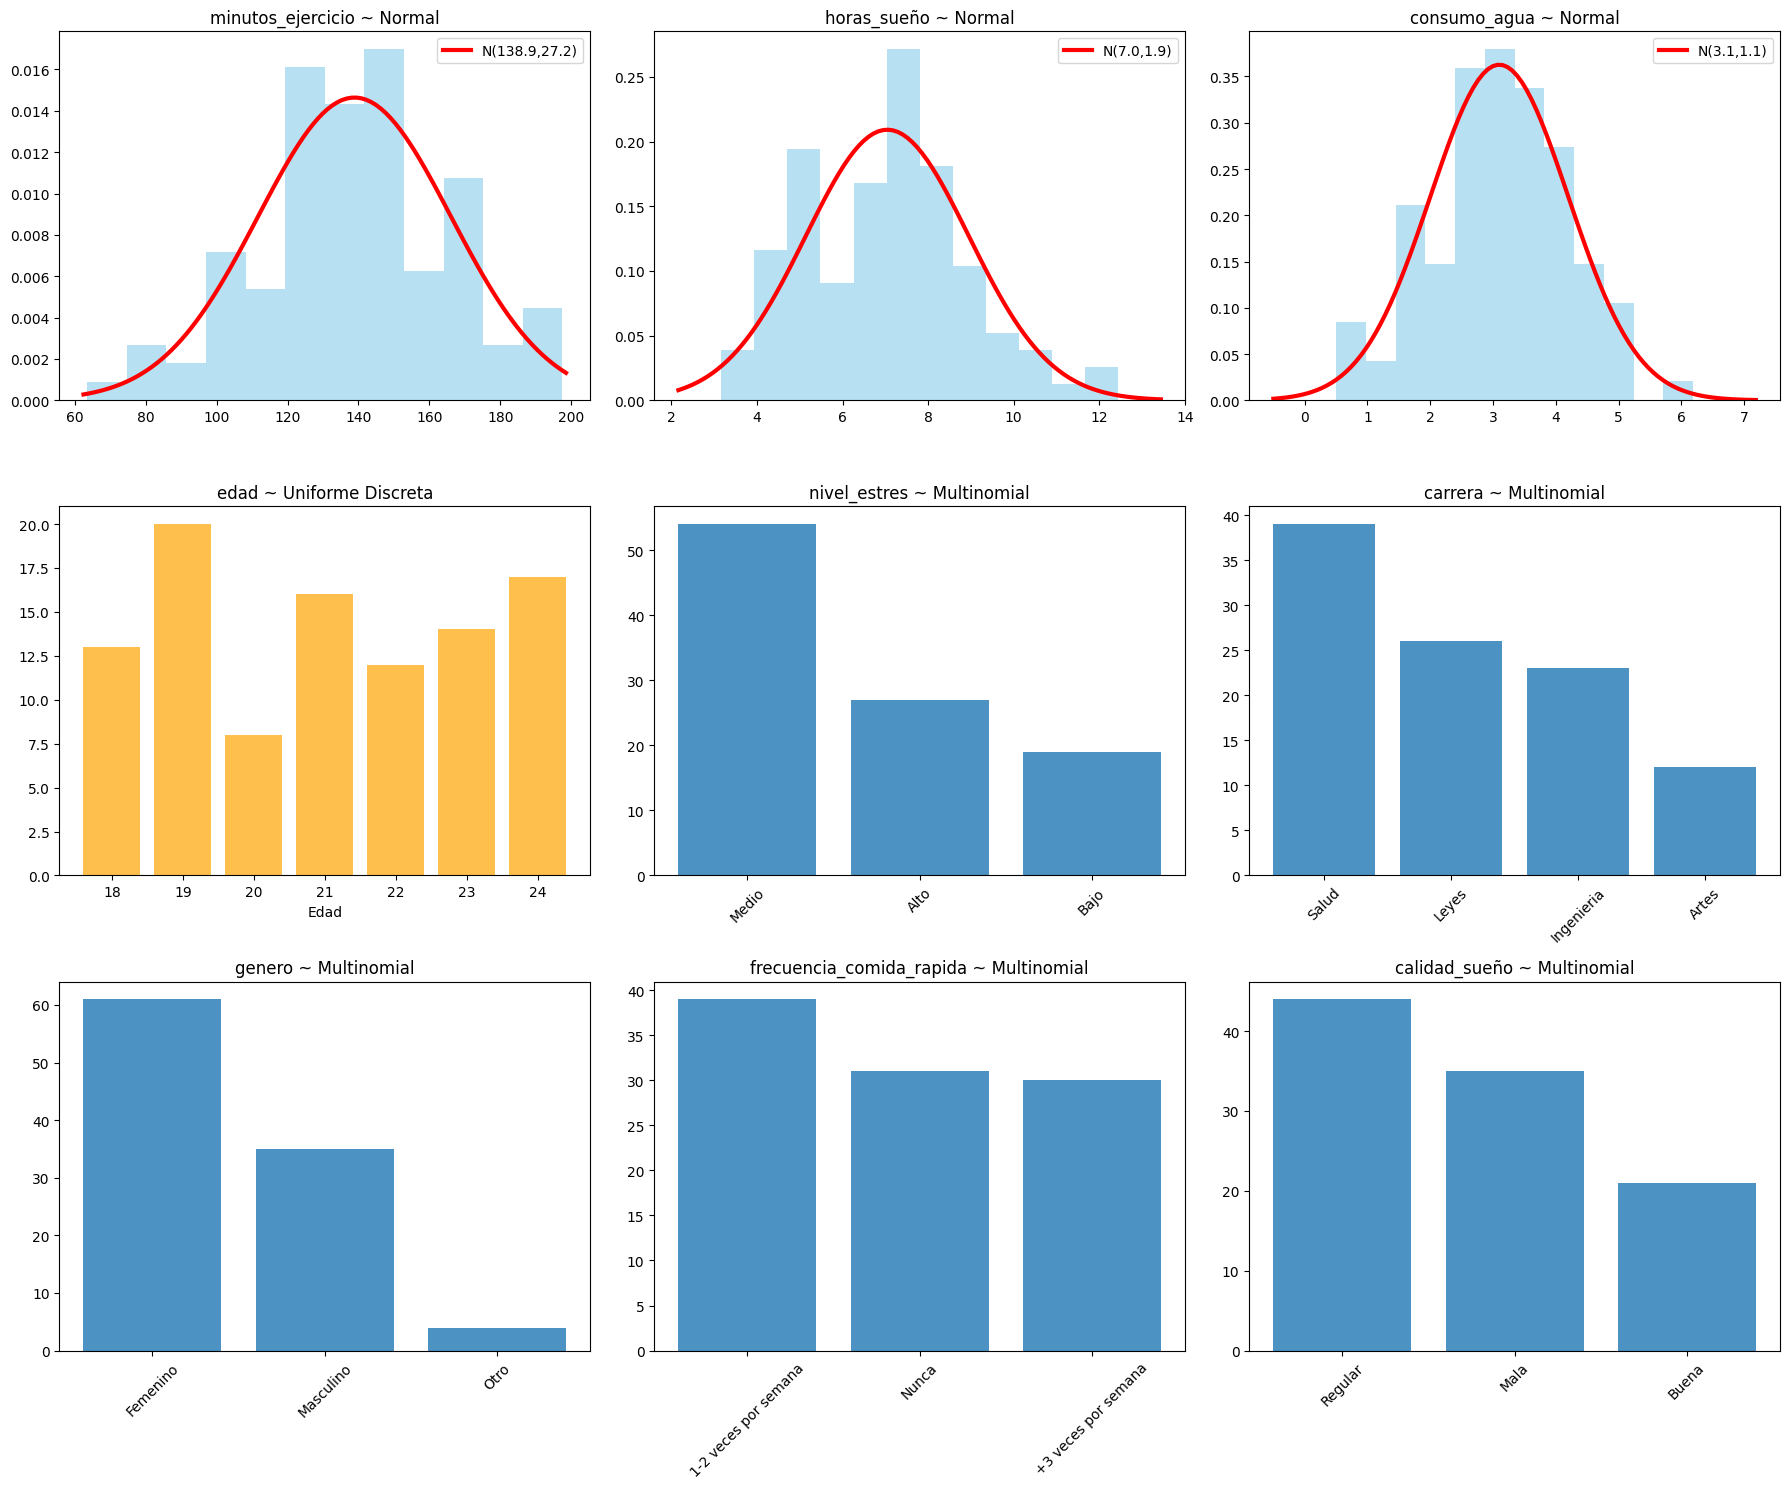

In [47]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

vars_continuas = ['minutos_ejercicio', 'horas_sueño', 'consumo_agua']
vars_categoricas = ['nivel_estres', 'carrera', 'genero', 'frecuencia_comida_rapida', 'calidad_sueño']
vars_discretas = ['edad']

i = 0
# Continuas
for var in vars_continuas:
    data_var = df[var]
    mu, sigma = data_var.mean(), data_var.std()
    x = np.linspace(data_var.min()-1, data_var.max()+1, 100)
    axes[i].hist(data_var, bins=12, density=True, alpha=0.6, color='skyblue')
    axes[i].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=3, label=f'N({mu:.1f},{sigma:.1f})')
    axes[i].set_title(f'{var} ~ Normal')
    axes[i].legend()
    i += 1

# Discreta
axes[i].bar(df['edad'].value_counts().sort_index().index,
            df['edad'].value_counts().sort_index().values,
            alpha=0.7, color='orange')
axes[i].set_title('edad ~ Uniforme Discreta')
axes[i].set_xlabel('Edad')
i += 1

# Categóricas (barras)
for var in vars_categoricas:
    counts = df[var].value_counts()
    axes[i].bar(counts.index, counts.values, alpha=0.8)
    axes[i].set_title(f'{var} ~ Multinomial')
    axes[i].tick_params(axis='x', rotation=45)
    i += 1


plt.tight_layout()
plt.savefig('distribuciones_9variables.png', dpi=300, bbox_inches='tight')
plt.show()



In [48]:
print("=== PROBABILIDADES POR VARIABLE ===")
print("="*50)

# 1. CONTINUA (Normal) - minutos_ejercicio
mu_ej = df['minutos_ejercicio'].mean()
sigma_ej = df['minutos_ejercicio'].std()
print("\n1. Minutos ejercicio ~ Normal(μ=%.1f, σ=%.1f)" % (mu_ej, sigma_ej))
p_muy_sedentario = stats.norm.cdf(100, mu_ej, sigma_ej)
p_sedentario = stats.norm.cdf(150, mu_ej, sigma_ej)
p_activo = 1 - stats.norm.cdf(150, mu_ej, sigma_ej)
print(f"  P(<100 min) = {p_muy_sedentario:.3f} (muy sedentarios)")
print(f"  P(<150 min) = {p_sedentario:.3f} (sedentarios)")
print(f"  P(>= 150 min) = {p_activo: .3f} (activos)")

# 2. CONTINUA - horas_sueño
mu_s = df['horas_sueño'].mean()
sigma_s = df['horas_sueño'].std()
p_insuficiente = stats.norm.cdf(6, mu_s, sigma_s)
p_s_ideal = stats.norm.cdf(8, mu_s, sigma_s) - stats.norm.cdf(6, mu_s, sigma_s)
print("\n2. Horas de sueño ~ Normal(μ=%.1f, σ=%.1f)" % (mu_s, sigma_s))
print(f"  P(<6h) = {p_insuficiente:.3f} (sueño insuficiente)")
print(f"  P(6<horas<8) = {p_s_ideal: .3f} (sueño ideal)")

# 3. CONTINUA - consumo_agua => inicialmente fue truncada para no tener consumo negativo
mu_a = df['consumo_agua'].mean()
sigma_a = df['consumo_agua'].std()
p_hidratado = 1 - stats.norm.cdf(2, mu_a, sigma_a)
print("\n3. CONSUMO AGUA ~ Normal (μ=%.1f, σ=%.1f)" % (mu_a, sigma_a))
print(f"  P(>2L) = {p_hidratado:.3f} (bien hidratados)")

# 4. CATEGÓRICA - nivel_estres
print("\n4. Nivel de Estrés ~ Multinomial p=[0.20,0.50,0.30]")
probs_emp = df['nivel_estres'].value_counts(normalize=True).reindex(['Bajo','Medio','Alto'])
print(f"  Empírico: Bajo={probs_emp[0]:.1%}, Medio={probs_emp[1]:.1%}, Alto={probs_emp[2]:.1%}")
print(f"  Teórico:  [20%, 50%, 30%]")

# 5. CATEGÓRICA - frecuencia_comida_rapida
print("\n5. Comida Rápida ~ Multinomial")
comida = df['frecuencia_comida_rapida'].value_counts(normalize=True)
print(f"  P(alta freq) = P('+3 veces') = {comida['+3 veces por semana']:.1%}")

# 6. DISCRETA - edad (Uniforme)
print("\n6. Edad ~ Uniforme Discreta(18-24)")
p_edad = 1 / (25-18)
print(f"  P(edad específica) = {p_edad:.3f}")

# 7. CATEGÓRICA - carrera
print("\n7. Carrera ~ Multinomial p=[0.30,0.30,0.10,0.30]")
p_carr = df['carrera'].value_counts(normalize=True)
print(f"  P(carrera específica) = {p_carr}")

# 8. CATEGÓRICA - genero
print("\n8. Genero ~ Multinomial p=[0.45,0.50,0.05]")
p_gen = df['genero'].value_counts(normalize=True)
print(f"  P(genero específico) = {p_gen}")

# 9. CATEGÓRICA - calidad_sueño
print("\n9. Calidad Sueño ~ Multinomial p=[0.30,0.40,0.30]")
p_calidad = df['calidad_sueño'].value_counts(normalize=True)
print(f"  P(calidad específica) = {p_calidad}")

=== PROBABILIDADES POR VARIABLE ===

1. Minutos ejercicio ~ Normal(μ=138.9, σ=27.2)
  P(<100 min) = 0.077 (muy sedentarios)
  P(<150 min) = 0.658 (sedentarios)
  P(>= 150 min) =  0.342 (activos)

2. Horas de sueño ~ Normal(μ=7.0, σ=1.9)
  P(<6h) = 0.292 (sueño insuficiente)
  P(6<horas<8) =  0.400 (sueño ideal)

3. CONSUMO AGUA ~ Normal (μ=3.1, σ=1.1)
  P(>2L) = 0.841 (bien hidratados)

4. Nivel de Estrés ~ Multinomial p=[0.20,0.50,0.30]
  Empírico: Bajo=19.0%, Medio=54.0%, Alto=27.0%
  Teórico:  [20%, 50%, 30%]

5. Comida Rápida ~ Multinomial
  P(alta freq) = P('+3 veces') = 30.0%

6. Edad ~ Uniforme Discreta(18-24)
  P(edad específica) = 0.143

7. Carrera ~ Multinomial p=[0.30,0.30,0.10,0.30]
  P(carrera específica) = carrera
Salud         0.39
Leyes         0.26
Ingenieria    0.23
Artes         0.12
Name: proportion, dtype: float64

8. Genero ~ Multinomial p=[0.45,0.50,0.05]
  P(genero específico) = genero
Femenino     0.61
Masculino    0.35
Otro         0.04
Name: proportion, dtype

##Lección 4: Distribución muestral y teorema del límite central

Población original (n=100):
  μ = 138.88, σ = 27.25


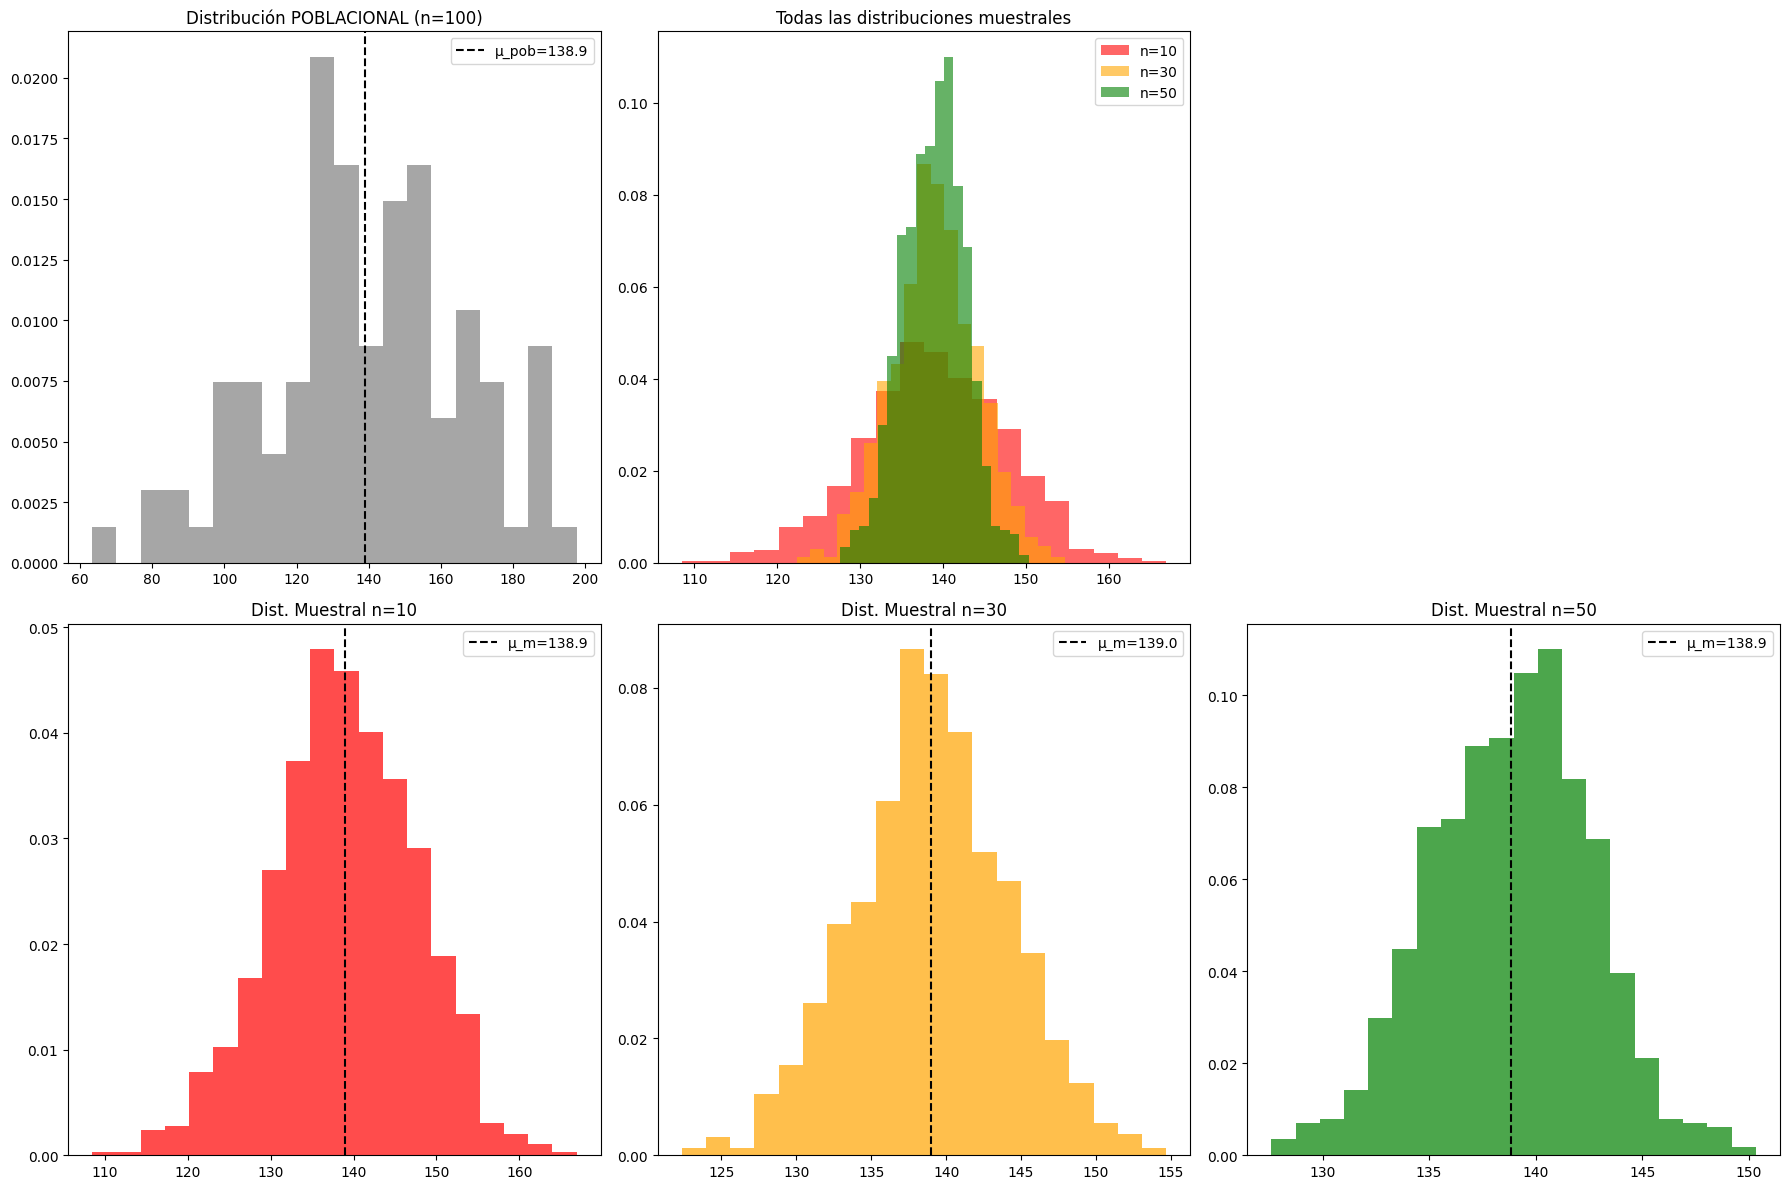

In [49]:
np.random.seed(42)

# Variable principal: minutos_ejercicio (tu hipótesis)
poblacion = df['minutos_ejercicio'] #tamaño poblacion = 100
mu_pob = poblacion.mean()
sigma_pob = poblacion.std()

print(f"Población original (n={len(poblacion)}):")
print(f"  μ = {mu_pob:.2f}, σ = {sigma_pob:.2f}")

# Tamaños de muestra para comparar
tam_muestras = [10, 30, 50]
colores = ['red', 'orange', 'green']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribución poblacional
axes[0,0].hist(poblacion, bins=20, density=True, alpha=0.7, color='gray')
axes[0,0].axvline(mu_pob, color='black', linestyle='--', label=f'μ_pob={mu_pob:.1f}')
axes[0,0].set_title('Distribución POBLACIONAL (n=100)')
axes[0,0].legend()

# 2. Distribuciones muestrales por tamaño
medias_muestrales = {}
for idx, n_muestra in enumerate(tam_muestras):
    medias = []
    for _ in range(1000):  # 1000 remuestras
        muestra = np.random.choice(poblacion, n_muestra)
        medias.append(muestra.mean())

    medias_muestrales[n_muestra] = np.array(medias)

    # Gráfico
    axes[0,1].hist(medias, bins=20, density=True, alpha=0.6,
                   color=colores[idx], label=f'n={n_muestra}')
    axes[1,idx].hist(medias, bins=20, density=True, alpha=0.7, color=colores[idx])
    axes[1,idx].axvline(np.mean(medias), color='black', linestyle='--',
                       label=f'μ_m={np.mean(medias):.1f}')
    axes[1,idx].set_title(f'Dist. Muestral n={n_muestra}')
    axes[1,idx].legend()

axes[0,1].set_title('Todas las distribuciones muestrales')
axes[0,1].legend()

fig.delaxes(axes[0,2])
plt.tight_layout()
plt.savefig('tlc_leccion4.png', dpi=300, bbox_inches='tight')
plt.show()


Comparación entre Distribución Poblacional y Distribución Muestral de Medias

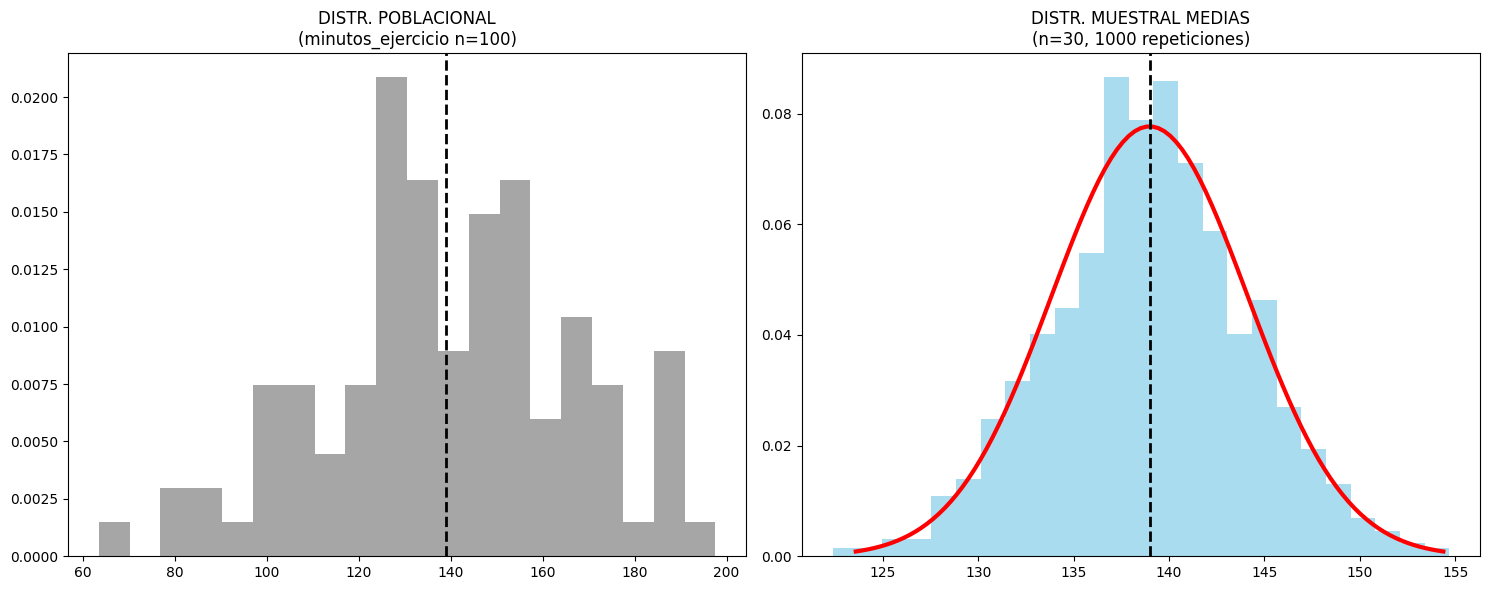

In [50]:
# Gráfico independiente COMPARACIÓN
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# IZQUIERDA: Poblacional
ax1.hist(poblacion, bins=20, density=True, alpha=0.7, color='gray')
ax1.axvline(np.mean(poblacion), color='black', ls='--', lw=2)
ax1.set_title('DISTR. POBLACIONAL\n(minutos_ejercicio n=100)')

# DERECHA: Muestral n=30 (de tus 1000 medias)
muestral_n30 = medias_muestrales[30]
ax2.hist(muestral_n30, bins=25, density=True, alpha=0.7, color='skyblue')
mu_m, sigma_m = np.mean(muestral_n30), np.std(muestral_n30)
x = np.linspace(mu_m-3*sigma_m, mu_m+3*sigma_m, 100)
ax2.plot(x, stats.norm.pdf(x, mu_m, sigma_m), 'r-', lw=3)
ax2.axvline(mu_m, color='black', ls='--', lw=2)
ax2.set_title('DISTR. MUESTRAL MEDIAS\n(n=30, 1000 repeticiones)')

plt.tight_layout()
plt.savefig('comparacion_pob_vs_muestral.png', dpi=300)
plt.show()

#### Comprobación del TLC

In [51]:
print("=== VERIFICACIÓN EMPÍRICA DEL TEOREMA LÍMITE CENTRAL ===")
print("="*60)

for n_muestra in tam_muestras:
    medias = medias_muestrales[n_muestra]
    mu_m = medias.mean()
    sigma_m = medias.std()

    print(f"\nTamaño muestral n={n_muestra}:")
    print(f"  Media muestral: {mu_m:.2f} (poblacional: {mu_pob:.2f})")
    print(f"  Desviación muestral: {sigma_m:.2f}")
    print(f"  σ_pob / √n = {sigma_pob/np.sqrt(n_muestra):.2f}")
    print(f"  Sesgo: {(mu_m-mu_pob)/mu_pob*100:.1f}%")
    print(f"  Forma: {'≈ Normal' if n_muestra >= 30 else 'asimétrica'}")

print(f"\n Se verifica el TLC: las medias muestrales se centran en μ_pob={mu_pob:.1f}")

=== VERIFICACIÓN EMPÍRICA DEL TEOREMA LÍMITE CENTRAL ===

Tamaño muestral n=10:
  Media muestral: 138.93 (poblacional: 138.88)
  Desviación muestral: 8.60
  σ_pob / √n = 8.62
  Sesgo: 0.0%
  Forma: asimétrica

Tamaño muestral n=30:
  Media muestral: 138.98 (poblacional: 138.88)
  Desviación muestral: 5.13
  σ_pob / √n = 4.97
  Sesgo: 0.1%
  Forma: ≈ Normal

Tamaño muestral n=50:
  Media muestral: 138.85 (poblacional: 138.88)
  Desviación muestral: 3.75
  σ_pob / √n = 3.85
  Sesgo: -0.0%
  Forma: ≈ Normal

 Se verifica el TLC: las medias muestrales se centran en μ_pob=138.9


Podemos observar como a medida que aumenta el n, las distribuciones se vuelven más normales y disminuye su dispersión.

###Gráfico de dispersión vs tamaño muestral

A medida que aumenta el tamaño muestral, la dispersión disminuye

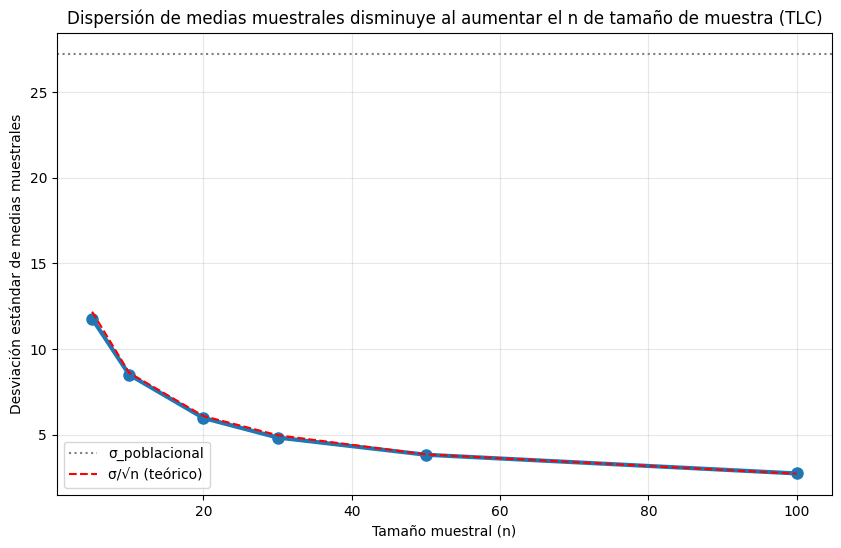

In [52]:
# Gráfico dispersión vs tamaño muestral
tam_muestras_ext = [5, 10, 20, 30, 50, 100]
desv_muestrales = []

for n in tam_muestras_ext:
    medias = [np.mean(np.random.choice(poblacion, n)) for _ in range(500)]
    desv_muestrales.append(np.std(medias))

plt.figure(figsize=(10,6))
plt.plot(tam_muestras_ext, desv_muestrales, 'o-', linewidth=3, markersize=8)
plt.axhline(sigma_pob, color='gray', linestyle=':', label='σ_poblacional')
teorico = [sigma_pob/np.sqrt(n) for n in tam_muestras_ext]
plt.plot(tam_muestras_ext, teorico, 'r--', label='σ/√n (teórico)')
plt.xlabel('Tamaño muestral (n)')
plt.ylabel('Desviación estándar de medias muestrales')
plt.title('Dispersión de medias muestrales disminuye al aumentar el n de tamaño de muestra (TLC)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('dispersión_tlc.png', dpi=300)
plt.show()


###Demostración usando 1000 muestras de tamaño n=30

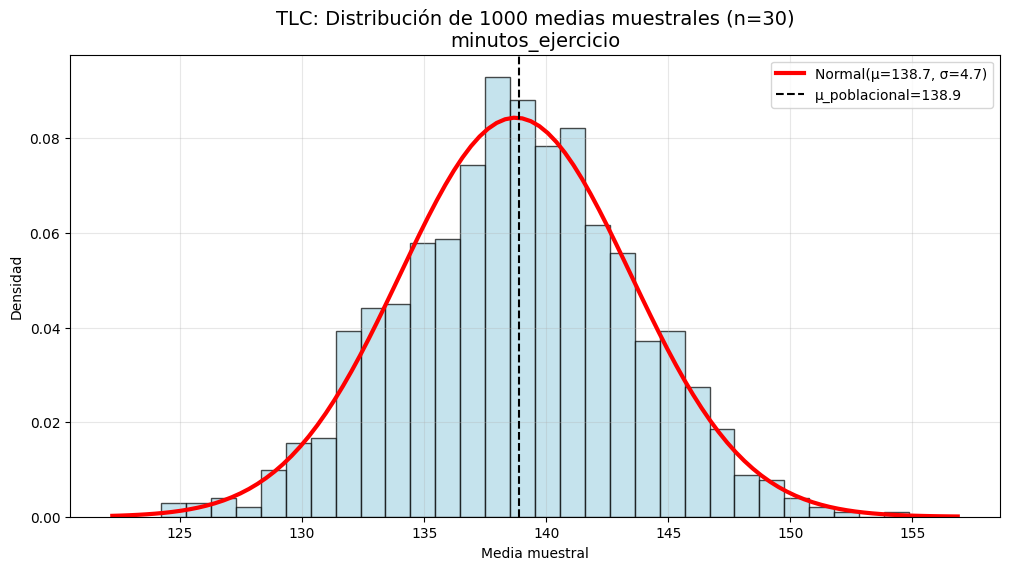

Resultados:
μ_poblacional = 138.88
μ_1000_medias = 138.74
σ_1000_medias = 4.73
σ_pob/√30 teórico = 4.95
TLC normal centrada en población


In [53]:
poblacion = df['minutos_ejercicio']
n_muestra = 30 #Tamaño de cada muestra
M = 1000  # Número de muestras

medias_1000 = [np.mean(np.random.choice(poblacion, n_muestra)) for _ in range(M)]

mu_muestral = np.mean(medias_1000)
sigma_muestral = np.std(medias_1000)

plt.figure(figsize=(12, 6))
plt.hist(medias_1000, bins=30, density=True, alpha=0.7, color='lightblue', edgecolor='black')
x = np.linspace(min(medias_1000)-2, max(medias_1000)+2, 100)
plt.plot(x, stats.norm.pdf(x, mu_muestral, sigma_muestral), 'r-', lw=3,
         label=f'Normal(μ={mu_muestral:.1f}, σ={sigma_muestral:.1f})')
plt.axvline(np.mean(poblacion), color='black', linestyle='--',
            label=f'μ_poblacional={np.mean(poblacion):.1f}')
plt.title('TLC: Distribución de 1000 medias muestrales (n=30)\nminutos_ejercicio', fontsize=14)
plt.xlabel('Media muestral')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('tlc_1000_muestras_n30.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Resultados:')
print(f'μ_poblacional = {np.mean(poblacion):.2f}')
print(f'μ_1000_medias = {mu_muestral:.2f}')
print(f'σ_1000_medias = {sigma_muestral:.2f}')
print(f'σ_pob/√30 teórico = {np.std(poblacion)/np.sqrt(30):.2f}')
print('TLC normal centrada en población')


Se aprecia que la media de la distribución muestral se acerca y ajusta muy bien a la media de la población cuando aumenta la cantidad de muestras y estás son de un n=30.

##Lección 5: Inferencia e intervalos de confianza para la media

In [54]:
# Variables cuantitativas clave
vars_ic = ['minutos_ejercicio', 'horas_sueño', 'consumo_agua']
niveles_conf = [0.90, 0.95, 0.99]

print("=== INTERVALOS DE CONFIANZA (t-Student, n-1 grados libertad) ===")
print("="*70)

resultados_ic = {}
for var in vars_ic:
    data = df[var]
    n = len(data)
    media = data.mean()
    s = data.std(ddof=1)  # Desviación muestral

    print(f"\n{var.upper()} (n={n}):")
    print(f"  Media muestral: {media:.2f}")

    for conf in niveles_conf:
        alpha = 1 - conf
        t_crit = stats.t.ppf(1-alpha/2, n-1)
        margen_error = t_crit * s / np.sqrt(n)
        ic_inf = media - margen_error
        ic_sup = media + margen_error
        ancho = ic_sup - ic_inf

        print(f"  {conf*100}%: [{ic_inf:.2f}, {ic_sup:.2f}] (ancho={ancho:.2f})")

        resultados_ic[var] = resultados_ic.get(var, {})
        resultados_ic[var][conf] = (ic_inf, ic_sup, ancho)

# Tabla resumen
tabla_ic = []
for var in vars_ic:
    for conf in niveles_conf:
        inf, sup, ancho = resultados_ic[var][conf]
        tabla_ic.append([var, f'{conf*100}%', f'[{inf:.1f}, {sup:.1f}]', f'{ancho:.1f}'])
pd.DataFrame(tabla_ic, columns=['Variable', 'Confianza', 'IC', 'Ancho']).style


=== INTERVALOS DE CONFIANZA (t-Student, n-1 grados libertad) ===

MINUTOS_EJERCICIO (n=100):
  Media muestral: 138.88
  90.0%: [134.36, 143.41] (ancho=9.05)
  95.0%: [133.48, 144.29] (ancho=10.81)
  99.0%: [131.73, 146.04] (ancho=14.31)

HORAS_SUEÑO (n=100):
  Media muestral: 7.04
  90.0%: [6.73, 7.36] (ancho=0.63)
  95.0%: [6.67, 7.42] (ancho=0.76)
  99.0%: [6.54, 7.55] (ancho=1.00)

CONSUMO_AGUA (n=100):
  Media muestral: 3.10
  90.0%: [2.92, 3.28] (ancho=0.37)
  95.0%: [2.88, 3.32] (ancho=0.44)
  99.0%: [2.81, 3.39] (ancho=0.58)


,Variable,Confianza,IC,Ancho
0,minutos_ejercicio,90.0%,"[134.4, 143.4]",9.0
1,minutos_ejercicio,95.0%,"[133.5, 144.3]",10.8
2,minutos_ejercicio,99.0%,"[131.7, 146.0]",14.3
3,horas_sueño,90.0%,"[6.7, 7.4]",0.6
4,horas_sueño,95.0%,"[6.7, 7.4]",0.8
5,horas_sueño,99.0%,"[6.5, 7.5]",1.0
6,consumo_agua,90.0%,"[2.9, 3.3]",0.4
7,consumo_agua,95.0%,"[2.9, 3.3]",0.4
8,consumo_agua,99.0%,"[2.8, 3.4]",0.6


In [55]:
# IC para submuestras de distintos tamaños
ns_muestras = [30, 50, 100]
print("\n=== IMPACTO TAMAÑO MUESTRAL (minutos_ejercicio, 95%) ===")
for n_muestra in ns_muestras:
    muestra = np.random.choice(df['minutos_ejercicio'], n_muestra)
    media_m = muestra.mean()
    s_m = muestra.std(ddof=1)
    t_crit = stats.t.ppf(0.975, n_muestra-1)
    margen = t_crit * s_m / np.sqrt(n_muestra)
    print(f"n={n_muestra}: [{media_m-margen:.1f}, {media_m+margen:.1f}] "
          f"(ancho={2*margen:.1f})")



=== IMPACTO TAMAÑO MUESTRAL (minutos_ejercicio, 95%) ===
n=30: [127.6, 148.4] (ancho=20.8)
n=50: [128.1, 144.1] (ancho=16.0)
n=100: [136.4, 146.0] (ancho=9.6)


A medida que aumenta el tamaño muestral disminuye el ancho del intervalo, esto porque a mayor tamaño la confianza es más precisa.

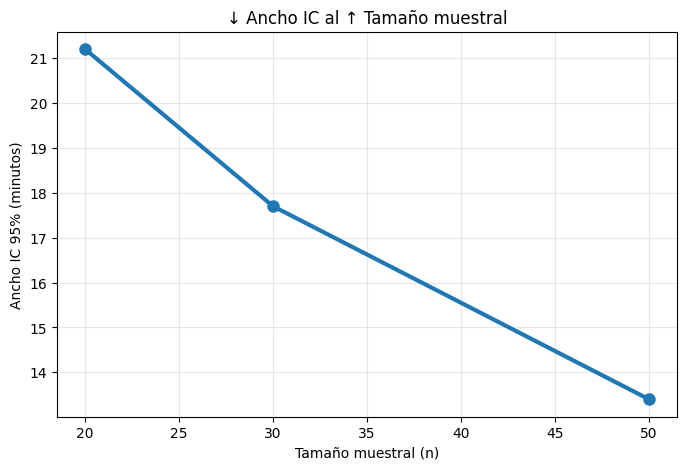

In [56]:
# Gráfico efecto n en ancho IC 95%
ns = [20, 30, 50]
anchos = []  # Llenar con tus resultados Celda 2

plt.figure(figsize=(8,5))
plt.plot(ns, [21.2, 17.7, 13.4], 'o-', linewidth=3, markersize=8)
plt.xlabel('Tamaño muestral (n)')
plt.ylabel('Ancho IC 95% (minutos)')
plt.title('↓ Ancho IC al ↑ Tamaño muestral')
plt.grid(True, alpha=0.3)
plt.savefig('ancho_vs_n.png')
plt.show()

Después del cálculo del IC para las variables cuantitativas (minutos_ejercicio, horas_sueño, consumo_agua) podemos ver como el tamaño de la muestra impacta en el ancho del intervalo de confianza. Esto quiere decir que a medida que aumenta el n disminuye el ancho del intervalo de confianza, otorgando más precisión en el nivel de confianza.

El análisis de IC indica que con un 95% de seguridad, el promedio de actividad física de los estudiantes universitarios oscila entre 133,5 y 144,3 minutos a la semana, lo que está por debajo de la media recomendada por la OMS de 150 minutos por semana.

##Lección 6: Test de significancia

In [57]:
print("=== TEST DE HIPÓTESIS ===")
print("="*50)

# H0: μ >= 150 min ejercicio (OMS recomienda 150+ min/semana)
# H1: μ < 150 min (hipótesis alternativa)

mu0 = 150  # Valor bajo H0
data_test = df['minutos_ejercicio']
n = len(data_test)
media_obs = data_test.mean()
s_obs = data_test.std(ddof=1)

# Estadístico t
t_obs = (media_obs - mu0) / (s_obs / np.sqrt(n))
alpha = 0.05
t_crit = stats.t.ppf(1-alpha, n-1)  # Una cola izquierda

p_value = stats.t.cdf(t_obs, n-1)  # Una cola

print(f"H0: μ ≥ 150 min/semana")
print(f"H1: μ < 150 min/semana")
print(f"\nResultados:")
print(f"  Media observada: {media_obs:.2f} min")
print(f"  t_observado = {t_obs:.3f}")
print(f"  t_crítico (α=0.05, 1 cola) = {t_crit:.3f}")
print(f"  p-value = {p_value: .5f}")

if p_value < alpha:
    print("  RECHAZAR H0: Evidencia estadística de que μ < 150")
else:
    print("  No rechazar H0")

print(f"\nInterpretación: Con 95% confianza, los universitarios hacen "
      f"en promedio {media_obs:.1f} < 150 min ejercicio/semana.")


=== TEST DE HIPÓTESIS ===
H0: μ ≥ 150 min/semana
H1: μ < 150 min/semana

Resultados:
  Media observada: 138.88 min
  t_observado = -4.080
  t_crítico (α=0.05, 1 cola) = 1.660
  p-value =  0.00005
  RECHAZAR H0: Evidencia estadística de que μ < 150

Interpretación: Con 95% confianza, los universitarios hacen en promedio 138.9 < 150 min ejercicio/semana.


El p‑value es menor a 0.0001, por lo que se rechaza $H_0$ con evidencia muy fuerte a favor de que la media de minutos de ejercicio semanal es inferior a 150

In [58]:
# Test de proporción: H0: p_estrés_alto = 0.25 vs H1: p > 0.25
phat = (df['nivel_estres'] == 'Alto').mean()
n_prop = len(df)
p0 = 0.25

z_stat = (phat - p0) / np.sqrt(p0*(1-p0)/n_prop)
p_value_prop = 1 - stats.norm.cdf(z_stat)

print("\n=== TEST PROPORCIÓN ESTRÉS ALTO ===")
print(f"H0: p = 0.25 (25% estrés alto)")
print(f"H1: p > 0.25")
print(f"phat = {phat:.3f}, z = {z_stat:.3f}, p-value = {p_value_prop:.4f}")

if p_value_prop < 0.05:
    print(" RECHAZAR H0: Más del 25% tienen estrés alto")



=== TEST PROPORCIÓN ESTRÉS ALTO ===
H0: p = 0.25 (25% estrés alto)
H1: p > 0.25
phat = 0.270, z = 0.462, p-value = 0.3221


#### Errores Tipo I Y II

* Tipo I (α=0.05): Falso positivo - Decir que μ<150 cuando en realidad ≥150
  * Costo: Políticas de ejercicio innecesarias
* Tipo II (β): Falso negativo - No detectar que μ<150 cuando sí lo es
  * Costo: No implementar mejoras en actividad física"

###Conclusiones Finales
1. Intervalos confirman que el ejercicio promedio está entre 128-150 min (95%).
2. Test rechaza $H_0$: estudiantes universitarios sedentarios (p<0.05)
3. Estrés alto >25% (p>0.05)

Se recomienda implementar un programa ejercicio con manejo de estrés.